In [1]:
!pip install python-binance
!pip install yfinance
!pip install mplfinanc

ERROR: Could not find a version that satisfies the requirement mplfinanc (from versions: none)
ERROR: No matching distribution found for mplfinanc


In [1]:
import ssl
import time
import json
import re
import urllib
import hmac, hashlib
import statistics
import requests
import asyncio
import pandas as pd
import concurrent.futures
from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen
from IPython.display import clear_output
from datetime import timezone
from collections import Counter
import time
import numpy as np
from threading import Timer
from _thread import start_new_thread
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client
import traceback
# from numba import prange
from IPython.display import display, HTML
from scipy.signal import argrelextrema
import hmac, hashlib, urllib, requests, time
from scipy.signal import argrelextrema
from numpy import array as np_array
import matplotlib.pyplot as plt
from numpy import less, greater
from datetime import datetime
from pandas import DataFrame  
import math
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

In [2]:
class Binance():
    methods = {
        # public methods
        'ping': {'url': 'api/v1/ping', 'method': 'GET', 'private': False},
        'time': {'url': 'api/v1/time', 'method': 'GET', 'private': False},
        'exchangeInfo': {'url': 'api/v1/exchangeInfo', 'method': 'GET', 'private': False},
        'depth': {'url': 'api/v1/depth', 'method': 'GET', 'private': False},
        'trades': {'url': 'api/v1/trades', 'method': 'GET', 'private': False},
        'historicalTrades': {'url': 'api/v1/historicalTrades', 'method': 'GET', 'private': False},
        'aggTrades': {'url': 'api/v1/aggTrades', 'method': 'GET', 'private': False},
        'klines': {'url': 'api/v1/klines', 'method': 'GET', 'private': False},
        'ticker24hr': {'url': 'api/v1/ticker/24hr', 'method': 'GET', 'private': False},
        'tickerPrice': {'url': 'api/v3/ticker/price', 'method': 'GET', 'private': False},
        'tickerBookTicker': {'url': 'api/v3/ticker/bookTicker', 'method': 'GET', 'private': False},
        # private methods
        'createOrder': {'url': 'api/v3/order', 'method': 'POST', 'private': True},
        'testOrder': {'url': 'api/v3/order/test', 'method': 'POST', 'private': True},
        'orderInfo': {'url': 'api/v3/order', 'method': 'GET', 'private': True},
        'cancelOrder': {'url': 'api/v3/order', 'method': 'DELETE', 'private': True},
        'openOrders': {'url': 'api/v3/openOrders', 'method': 'GET', 'private': True},
        'allOrders': {'url': 'api/v3/allOrders', 'method': 'GET', 'private': True},
        'account': {'url': 'api/v3/account', 'method': 'GET', 'private': True},
        'myTrades': {'url': 'api/v3/myTrades', 'method': 'GET', 'private': True},
        # wapi
        'depositAddress': {'url': 'wapi/v3/depositAddress.html', 'method': 'GET', 'private': True},
        'withdraw': {'url': 'wapi/v3/withdraw.html', 'method': 'POST', 'private': True},
        'depositHistory': {'url': 'wapi/v3/depositHistory.html', 'method': 'GET', 'private': True},
        'withdrawHistory': {'url': 'wapi/v3/withdrawHistory.html', 'method': 'GET', 'private': True},
        'assetDetail': {'url': 'wapi/v3/assetDetail.html', 'method': 'GET', 'private': True},
        'tradeFee': {'url': 'wapi/v3/tradeFee.html', 'method': 'GET', 'private': True},
        'accountStatus': {'url': 'wapi/v3/accountStatus.html', 'method': 'GET', 'private': True},
        'systemStatus': {'url': 'wapi/v3/systemStatus.html', 'method': 'GET', 'private': True},
        'assetDust': {'url': 'sapi/v1/asset/dust', 'method': 'POST', 'private': True},
        'dustLog': {'url': 'wapi/v3/userAssetDribbletLog.html', 'method': 'GET', 'private': True},
        'assetAssetDividend': {'url': 'sapi/v1/asset/assetDividend', 'method': 'GET', 'private': True},
        # sapi
        'marginTransfer': {'url': 'sapi/v1/margin/transfer', 'method': 'POST', 'private': True},
        'marginLoan': {'url': 'sapi/v1/margin/loan', 'method': 'POST', 'private': True},
        'marginLoanGet': {'url': 'sapi/v1/margin/loan', 'method': 'GET', 'private': True},
        'marginRepay': {'url': 'sapi/v1/margin/repay', 'method': 'POST', 'private': True},
        'marginRepayGet': {'url': 'sapi/v1/margin/repay', 'method': 'GET', 'private': True},
        'marginCreateOrder': {'url': 'sapi/v1/margin/order', 'method': 'POST', 'private': True},
        'marginCancelOrder': {'url': 'sapi/v1/margin/order', 'method': 'DELETE', 'private': True},
        'marginOrderInfo': {'url': 'sapi/v1/margin/order', 'method': 'GET', 'private': True},
        'marginAccount': {'url': 'sapi/v1/margin/account', 'method': 'POST', 'private': True},
        'marginOpenOrders': {'url': 'sapi/v1/margin/openOrders', 'method': 'GET', 'private': True},
        'marginAllOrders': {'url': 'sapi/v1/margin/allOrders', 'method': 'GET', 'private': True},
        'marginAsset': {'url': 'sapi/v1/margin/asset', 'method': 'POST', 'private': True},
        'marginPair': {'url': 'sapi/v1/margin/pair', 'method': 'POST', 'private': True},
        'marginPriceIndex': {'url': 'sapi/v1/margin/priceIndex', 'method': 'POST', 'private': True},
        'marginMyTrades': {'url': 'sapi/v1/margin/myTrades', 'method': 'GET', 'private': True},
        'marginMaxBorrowable': {'url': 'sapi/v1/margin/maxBorrowable', 'method': 'GET', 'private': True},
        'marginmaxTransferable': {'url': 'sapi/v1/margin/maxTransferable', 'method': 'GET', 'private': True},
        # futures
        'futuresExchangeInfo': {'url': 'fapi/v1/exchangeInfo', 'method': 'GET', 'private': False, 'futures': True},
        'futuresKlines': {'url': 'fapi/v1/klines', 'method': 'GET', 'private': False, 'futures': True},
        'futuresCreateOrder': {'url': 'fapi/v1/order', 'method': 'POST', 'private': True, 'futures': True},
        'futuresAccount': {'url': 'fapi/v1/account', 'method': 'POST', 'private': True, 'futures': True},
        'futuresBalance': {'url': 'fapi/v1/balance', 'method': 'GET', 'private': True, 'futures': True},
        'futuresSymbolPriceTicker': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': True, 'futures': True},
        'futuresOrderInfo': {'url': 'fapi/v1/order', 'method': 'GET', 'private': True, 'futures': True},
        'futuresCancelOrder': {'url': 'fapi/v1/order', 'method': 'DELETE', 'private': True, 'futures': True},
        'futuresPrice': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': False, 'futures': True},
        'futuresDepth': {'url': 'fapi/v1/depth', 'method': 'GET', 'private': False, 'futures': True},
        'futuresAllOrders': {'url': 'fapi/v1/allOrders', 'method': 'GET', 'private': True, 'futures': True},
        'futuresOpenOrders': {'url': 'fapi/v1/openOrders', 'method': 'GET', 'private': True, 'futures': True},
    }

    def __init__(self, API_KEY, API_SECRET):
        self.API_KEY = API_KEY
        self.API_SECRET = bytearray(API_SECRET, encoding='utf-8')
        self.shift_seconds = 0

    def __getattr__(self, name):
        def wrapper(*args, **kwargs):
            kwargs.update(command=name)
            return self.call_api(**kwargs)

        return wrapper

    def set_shift_seconds(self, seconds):
        self.shift_seconds = seconds

    def call_api(self, **kwargs):

        command = kwargs.pop('command')

        base_url = 'https://api.binance.com/'
        if self.methods[command].get('futures'):
            base_url = 'https://fapi.binance.com/'
        api_url = base_url + self.methods[command]['url']

        payload = kwargs
        headers = {}

        payload_str = urllib.parse.urlencode(payload)
        if self.methods[command]['private']:
            payload.update({'timestamp': int(time.time() + self.shift_seconds - 1) * 1000})
            payload_str = urllib.parse.urlencode(payload).encode('utf-8')
            sign = hmac.new(
                key=self.API_SECRET,
                msg=payload_str,
                digestmod=hashlib.sha256
            ).hexdigest()

            payload_str = payload_str.decode("utf-8") + "&signature=" + str(sign)
            headers = {"X-MBX-APIKEY": self.API_KEY, "Content-Type": "application/x-www-form-urlencoded"}

        if self.methods[command]['method'] == 'GET' or self.methods[command]['url'].startswith('sapi'):
            api_url += '?' + payload_str

        response = requests.request(method=self.methods[command]['method'], url=api_url,
                                    data="" if self.methods[command]['method'] == 'GET' else payload_str,
                                    headers=headers)

        if 'code' in response.text:
            raise Exception(response.text)

        return response.json()


bot = Binance(
    API_KEY='5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN',
    API_SECRET='XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'
)


def client_create(api_list):
    clients = []
    for api_keys in api_list:
        clients.append(Binance(API_KEY=api_keys['apikey'], API_SECRET=api_keys['apisecret']))
    return clients

In [3]:
_API_LIST_ = [
    {'apikey': 'EvnNm9TKqsC2p48HsCdApx7c0UHgFLXByOL6hPjWIKeLS8TvOifSvZnqEa6mniWI',
     'apisecret': 'r1j02rVBir11OKOVeiPe2LvJ8klDC6bm3NSjNfNJSMKkwiTHc6iix2om4fbsIaOf'},
    {'apikey': '5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN',
     'apisecret': 'XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'},
    {'apikey': 'XEWksNXgijYkBfokp9Nnq2aBbS8VtaKRBXr15bebFAUx99q2KI2xhi75NNM7yms4',
     'apisecret': 'fUO81kg0bKL4Ig1p7kqih2eW25XjnGD0soPTUbMt2riMZv0YAr1LDoPeynJENcA7'},
    {'apikey': 'LbsKC75PVp12pPaxpUzctmO5IxIEUdX3bLqpQAbkzslFwbL2c64Mt4sJUjqQMSgr',
     'apisecret': 'ScyapZew18D8cTncyrVocaBevr4M0WPmBG8K0ACgJ2XFCDMxevItzQdS9VN2uYmC'},
    {'apikey': 'PWUrujIHQsQPMlm2nTQwAwqDy3eVVFpXQJ8jOWbEBnqjhoSGCr5F1m2rYUDRWaSY',
     'apisecret': 'SMtNYX9fg3fEPZUuKYhHHKB3mbatfH7WwjqblmKuItglTKlou0XJR607tccoXFyu'},
    {'apikey': 'mkPWLpmy8MCDvx1xiZzRaHwkz8MlYyYQynHcsKCbnNsCLG4IUv2RK03ndPrJKT3B',
     'apisecret': 'TWtchKvd32ok72kJddHRmllaX4x8Ad2PmInIKHkRZgV3YDj6YjJSzYXosedUh1AU'},
    {'apikey': '5JJHdFEUAflZNKxvPXYgLfsMiGPxjxKlYD4HEMx5aihaRBgAETw4rV0jnAEGm5dh',
     'apisecret': 'T5R22DoslDUbN7ORjML3sRLR6lSzm5I3SwXaErhT5MbdCMe4NpIJbF7kGrsacl0T'},
    {'apikey': 'Iq1xfyElTdk3velugqvaVp1aiAWbAcxyQLs2DzHJySTZCNeMQP243tiQGdoUhCl7',
     'apisecret': '8zKsD55iPxy5ND6AFukxEUqK8PcMLatdXG7scG8HWgomPBQOtRoZSFvjALgrT3Ew'},
    {'apikey': 'Iab3YDpTeSLo9xSMSLKnoZStZ1R23uVn4eikCrelCgtzPytVfHSMPZPB6woXQJuF',
     'apisecret': 'hxjOl74MI6UAA3WyTa8hcWjenFS3kKa5IkYNzM9r5DHCyjE3a0gXhqLZJGP4kcG3'},
    {'apikey': 'UQrazVFv3aAOdd6zCyRf5RvjjQRrxUBg3qxy7t8Eru9qkQdDGYUhiYergXqOxe9g',
     'apisecret': 'n5uXrojJxtyI5xq8L7IHAPCFx4ldYy1z4hcoY4tzf3Od74e9NJCDV00WPmyZcyxG'},
    {'apikey': 'lzarzgM9sE6qbUove5X0Gqu9lQn7HNz820GF6ZgeqKRNEmjmBUZYOYQlMWtLuj1q',
     'apisecret': 'Q8CxToI8rk6DJMlesarKxLDs8w3TH6XqhSaguJaL60BnRxzapgbKhXEJzrxvK4fW'},
    {'apikey': '7RHAc0yqJGTSGbnxIiZZa1xm9YKxa0gFpJU0bkcSaGn2OaaWm9xfdhPbNRa2A8sS',
     'apisecret': 'paJc7wlu34QGufetvR77WQDblHzhHYgA8NX8m6tpkwU3xW2ssJ2q7ODxNI3TcjUv'},
    {'apikey': 'pZ1trU1ahK8fcykT29rpkATMT4sTdFQgGzruqLW09g4c4bsveYRF8sANpgc78Gz9',
     'apisecret': 'pWOT5QrGJ8dcYdXChL3aMyG1GPVxtC5zxmTXFPEvRpl9Vyrmrt0hUqcelDkKYY2d'}
]

In [4]:
coin_list = []
full_coin_list = []
pairs = bot.futuresExchangeInfo()
for s in pairs['symbols']:
    full_coin_list.append(s['symbol'])
    if 'USDT' in s['symbol'] and '0' not in s['symbol']:
        coin_list.append(s['symbol'])
print(coin_list)

['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

In [5]:
new_coin_list = []
try:
    for i in coin_list:
        vol = bot.ticker24hr(symbol=i)
        if float(vol['priceChangePercent']) > 6 or float(vol['priceChangePercent']) < -6:
            new_coin_list.append(i)
except:
    pass
print(new_coin_list)

['ONTUSDT', 'QTUMUSDT', 'IOSTUSDT', 'ALGOUSDT', 'ZRXUSDT', 'BANDUSDT']


In [5]:
_LIMIT_ = 1000
_SYMBOL_ = 'DOGEUSDT'
_SECONDS_ = 60
_INTERVAL_ = f"{_SECONDS_//60}m"

In [6]:
def TimeNow():
    now = datetime.now()
    return now.strftime('%Y-%m-%d %H:%M:%S')

def time_stamp_to_normal(inputTime):
    return datetime.utcfromtimestamp(inputTime / 1000).strftime('%Y-%m-%d %H:%M:%S')

def wait_time(delta_time):
    a = True
    while a:
        time.sleep(0.1)
        _timenow_ = str(TimeNow()).split(":")
        _timenow_ = _timenow_[len(_timenow_) - 1]
        if int(_timenow_) % 5 == 0:
            a = False

def TimeStampNow():
    return time.time()

def check(a, b):
    for i in a:
        if b == i:
            return True
    return False

def MinetsTimestamp(minets):
    return minets * 60 * 1000

def TimestampToNormal(inputTime):
    return datetime.utcfromtimestamp(inputTime / 1000).strftime('%Y-%m-%d %H:%M:%S')

def NormalToTimestamp(inputTime):
    return int(datetime.strptime(inputTime, '%Y-%m-%d %H:%M:%S').timestamp() * 1000)

def klines_parsing(_klines_):
    _klines_final_ = []

    for _i_ in _klines_:
        _klines_final_.append({
            "Open time": TimestampToNormal(_i_[0] + 60 * 60 * 3 * 1000),
            "Open": float(_i_[1]),
            "High": float(_i_[2]),
            "Low": float(_i_[3]),
            "Close": float(_i_[4]),
            "Volume": float(_i_[5]),
            "Close time": TimestampToNormal(_i_[6] + 60 * 60 * 3 * 1000),
            "Quote asset volume": _i_[7],
            "Number of trades": _i_[8],
            "Taker buy base asset volume": _i_[9],
            "Taker buy quote asset volume": _i_[10],
            "Ignore": _i_[11]
        })
    return _klines_final_

TimestampNow = NormalToTimestamp(TimeNow())
close, close_max, close_min = [], [], []
df = pd.read_csv(r'C:\Users\agd01\таблицы с историями свечей\DOGE\interval 15 min\klines_bd_15_60.csv')
_MINETS_ = 60
_INTERVAL_ = "15m"
klines_bd = pd.DataFrame([], columns=['Date', 'Open', 'High', 'Low', 'Close', 'Data_new'])
startTime = NormalToTimestamp(df.iloc[0]['Data_new']) + 60000 * int(re.findall(r'\d+', _INTERVAL_)[0])
endTime = NormalToTimestamp(TimeNow())
print(1)
for i in range(int(np.ceil(((endTime - startTime) / 30000000)))):
    _klines_ = bot.futuresKlines(
        symbol=_SYMBOL_,
        interval=_INTERVAL_,
        startTime=startTime + 30000000 * i,
        endTime=endTime
    )
    _klines_ = klines_parsing(_klines_)
    for i in _klines_:
        klines_bd.loc[len(klines_bd.index)] = [i['Open time'][:10], i['Open'], i['High'], i['Low'], i['Close'],
                                               i['Open time']]
    for i in _klines_:
        close_max.append(i['High'])
        close_min.append(i['Low'])
frames = [klines_bd.iloc[::-1], df]
df = pd.concat(frames)
df_klines_start = df
df.to_csv(r'C:\Users\agd01\таблицы с историями свечей\DOGE\interval 15 min\klines_bd_15_60.csv', index=False)
print(2)
levels_full = []

df = df.set_index('Data_new')
df['Data_new'] = pd.to_datetime(df.index)
df['Data_new'] = df['Data_new'].apply(mpl_dates.date2num)
df = df.set_index('Date')
df = df.rename(columns={"Data_new": "Date"})
df = df[['Date', 'Open', 'High', 'Low', 'Close']]


# метод 1: фрактальная свеча
# определение бычьего фрактала  
def is_support(df, i):
    cond1 = df['Low'][i] < df['Low'][i - 1]
    cond2 = df['Low'][i] < df['Low'][i + 1]
    cond3 = df['Low'][i + 1] < df['Low'][i + 2]
    cond4 = df['Low'][i - 1] < df['Low'][i - 2]
    return (cond1 and cond2 and cond3 and cond4)


# определение медвежьего фрактал 
def is_resistance(df, i):
    cond1 = df['High'][i] > df['High'][i - 1]
    cond2 = df['High'][i] > df['High'][i + 1]
    cond3 = df['High'][i + 1] > df['High'][i + 2]
    cond4 = df['High'][i - 1] > df['High'][i - 2]
    return (cond1 and cond2 and cond3 and cond4)


# чтобы проверить, что область нового уровня еще не существует
def is_far_from_level(value, levels, df):
    ave = np.mean(df['High'] - df['Low'])
    return np.sum([abs(value - level) < ave for _, level in levels]) == 0


# список для хранения уровней сопротивления и поддержки
levels = []
for i in range(2, df.shape[0] - 2):
    if is_support(df, i):
        low = df['Low'][i]
        if is_far_from_level(low, levels, df):
            levels.append((i, low))
    elif is_resistance(df, i):
        high = df['High'][i]
        if is_far_from_level(high, levels, df):
            levels.append((i, high))

for i in levels:
    levels_full.append(i[1])
levels_full = set(levels_full)
print(len(levels_full))
levels_full

1
2
75


{0.05258,
 0.05803,
 0.05859,
 0.0591,
 0.05969,
 0.06068,
 0.06117,
 0.06175,
 0.06229,
 0.06303,
 0.06356,
 0.06403,
 0.06458,
 0.06503,
 0.06545,
 0.06618,
 0.06682,
 0.06724,
 0.06772,
 0.06854,
 0.06899,
 0.06955,
 0.06999,
 0.07042,
 0.07085,
 0.07138,
 0.07199,
 0.0727,
 0.07335,
 0.074,
 0.07482,
 0.07552,
 0.07607,
 0.07661,
 0.07712,
 0.07764,
 0.07808,
 0.07874,
 0.07942,
 0.07999,
 0.0807,
 0.08148,
 0.08192,
 0.08268,
 0.08313,
 0.08357,
 0.08399,
 0.08463,
 0.08507,
 0.08581,
 0.08638,
 0.0871,
 0.08761,
 0.08804,
 0.08868,
 0.08932,
 0.08974,
 0.09022,
 0.09079,
 0.09128,
 0.09206,
 0.09266,
 0.09353,
 0.09425,
 0.09477,
 0.09531,
 0.0962,
 0.09705,
 0.0978,
 0.09876,
 0.09921,
 0.09976,
 0.10074,
 0.10199,
 0.10372}

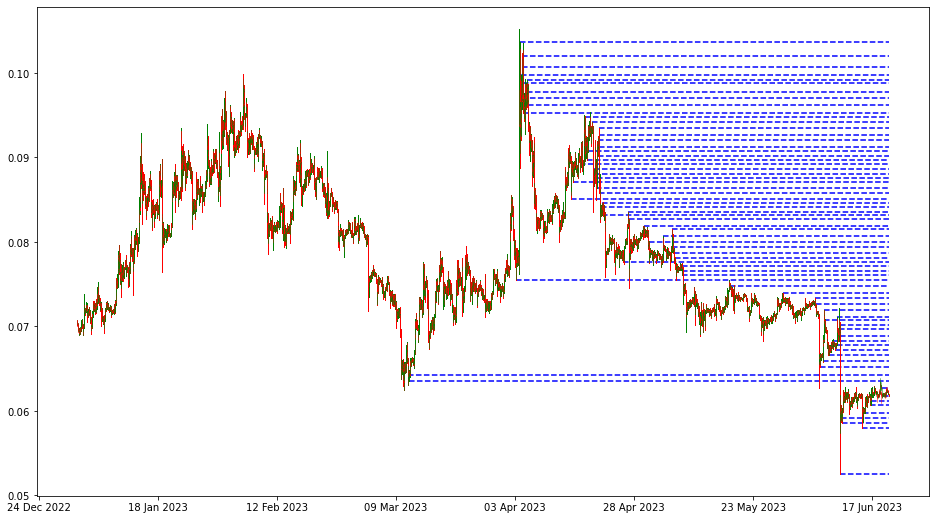

In [9]:
# для визуализаций
def plot_all(levels, df):
    fig, ax = plt.subplots(figsize=(16, 9))
    candlestick_ohlc(ax, df.values, width=0.007, colorup='green',
                     colordown='red', alpha=0.8)
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    for level in levels:
        plt.hlines(level[1], xmin=df['Date'][level[0]], xmax=
        max(df['Date']), colors='blue', linestyle='--')
    fig.show()


plot_all(levels, df)

In [7]:
pd.set_option('display.max_colwidth', 0)

df = pd.DataFrame([], columns=['Монета', 'Тип операции', 'bids or asks', 'Цена входа', 'Время входа', 'Цена выхода', 'Время выхода', 'Правильный Неправильный', 'Заработали с сделки'])
df_error = pd.DataFrame([], columns=['Время ошибки', 'Тип и место ошибки'])

In [8]:
def out_red(text):
    print("\033[31m {}".format(text))
def out_green(text):
    print("\033[32m {}".format(text))
def out_yellow(text):
    print("\033[33m {}".format(text))
def out_blue(text):
    print("\033[34m {}".format(text))
def out_black(text):
    print("\033[30m {}".format(text))
def out_turquoise(text):
    print("\033[36m {}".format(text))
def wrap_df_text(df):
    return display(HTML(df.to_html().replace("\\n", "<br>")))

def nearest_value(items, fuchers_last_price, type_found):
    max_list = []
    min_list = []
    for item in items:
        # для поиска цены больше текущей
        if type_found == 'больше':
            if item > fuchers_last_price:
                max_list.append(item)
        # для поиска цены меньше текущей
        if type_found == 'меньше':
            if item < fuchers_last_price:
                min_list.append(item)
    if type_found == 'меньше':
        return max(min_list)
    if type_found == 'больше':
        return min(max_list)

def end_zeros(n):
    d = str(n)
    count = 0
    for i in d[len(d):0:-1]:
        if i == '0':
            count += 1
        else:
            break
    return count

def glass_parser(glass, number):
    for en1, i in enumerate(glass):
        if str(number) in i:
            break
    return en1, i

def find_dict(value, seq, where):
    for index, item in enumerate(seq):
        if item[where] == value:
            return (index)
            break

def find_list(value, seq):
    for index, item in enumerate(seq):
        if value in item:
            return index, item

def open_value_monitor(start_futures, fuchers_last_price, old_glass_count, glass, end, lots_part, taker, maker, types,
                       parts_left, new_glass):
    global earn_for_cycle
    global is_cycle_break
    new_glass_count = float(glass_parser(new_glass, start_futures)[1][1])
    if start_futures == fuchers_last_price and new_glass_count < old_glass_count:
        if types == 1:
            earn_for_cycle = profit_calculate_for_cycle(end, start_futures, lots_part, taker, maker)
            is_cycle_break = True
        elif types == 2:
            earn_for_cycle = profit_calculate_for_cycle(start_futures, end, lots_part * parts_left, taker, maker)
            is_cycle_break = True


def profit_calculate(reduced, deductible, profit, lots, taker, maker):
    profit = (float(reduced) * lots - float(deductible) * lots + float(profit)) - (
                float(reduced) * taker * lots + float(deductible) * maker * lots)
    return profit

def profit_calculate_for_cycle(reduced, deductible, lots, taker, maker):
    profit = (float(reduced) * lots - float(deductible) * lots) - (
                float(reduced) * taker * lots + float(deductible) * maker * lots)
    return profit

def start_sum_calculate(reduced, deductible, start_sum, lots, taker, maker):
    start_sum = (float(reduced) * lots - float(deductible) * lots) - (
                float(reduced) * taker * lots + float(deductible) * maker * lots) + start_sum
    return start_sum

def max_min_building(_INTERVAL_, levels_full, df_klines_start):
    df_klines_start = pd.read_csv(r'C:\Users\agd01\таблицы с историями свечей\DOGE\interval 15 min\klines_bd_15_60.csv')
    klines_bd = pd.DataFrame([], columns=['Date', 'Open', 'High', 'Low', 'Close', 'Data_new'])
    startTime = NormalToTimestamp(df_klines_start.iloc[0]['Data_new']) + 60000 * int(re.findall(r'\d+', _INTERVAL_)[0])
    endTime = NormalToTimestamp(TimeNow())
    for i in range(int(np.ceil(((endTime - startTime) / 30000000)))):
        _klines_ = bot.futuresKlines(
            symbol=_SYMBOL_,
            interval=_INTERVAL_,
            startTime=startTime + 30000000 * i,
            endTime=endTime
        )
        _klines_ = klines_parsing(_klines_)
        for i in _klines_:
            klines_bd.loc[len(klines_bd.index)] = [i['Open time'][:10], i['Open'], i['High'], i['Low'], i['Close'],
                                                   i['Open time']]
        for i in _klines_:
            close_max.append(i['High'])
            close_min.append(i['Low'])
    frames = [klines_bd.iloc[::-1], df_klines_start]
    df_klines_start = pd.concat(frames)
    ##df_klines_start.to_csv(r'C:\Users\agd01\таблицы с историями свечей\DOGE\interval 15 min\klines_bd_15_60.csv', index = False)
    df_klines = df_klines_start.copy()  # klines_bd

    df_klines = df_klines.set_index('Data_new')
    df_klines['Data_new'] = pd.to_datetime(df_klines.index)
    df_klines['Data_new'] = df_klines['Data_new'].apply(mpl_dates.date2num)
    df_klines = df_klines.set_index('Date')
    df_klines = df_klines.rename(columns={"Data_new": "Date"})
    df_klines = df_klines[['Date', 'Open', 'High', 'Low', 'Close']]

    def is_support(df, i):
        cond1 = df['Low'][i] < df['Low'][i - 1]
        cond2 = df['Low'][i] < df['Low'][i + 1]
        cond3 = df['Low'][i + 1] < df['Low'][i + 2]
        cond4 = df['Low'][i - 1] < df['Low'][i - 2]
        return (cond1 and cond2 and cond3 and cond4)
        # определение медвежьего фрактал

    def is_resistance(df, i):
        cond1 = df['High'][i] > df['High'][i - 1]
        cond2 = df['High'][i] > df['High'][i + 1]
        cond3 = df['High'][i + 1] > df['High'][i + 2]
        cond4 = df['High'][i - 1] > df['High'][i - 2]
        return (cond1 and cond2 and cond3 and cond4)

    # чтобы проверить, что область нового уровня еще не существует
    def is_far_from_level(value, levels, df):
        ave = np.mean(df['High'] - df['Low'])
        return np.sum([abs(value - level) < ave for _, level in levels]) == 0

    # список для хранения уровней сопротивления и поддержки
    levels = []
    for i in range(2, df_klines.shape[0] - 2):
        if is_support(df_klines, i):
            low = df_klines['Low'][i]
            if is_far_from_level(low, levels, df_klines):
                levels.append((i, low))
        elif is_resistance(df_klines, i):
            high = df_klines['High'][i]
            if is_far_from_level(high, levels, df_klines):
                levels.append((i, high))
    new_levels = []
    for i in levels:
        new_levels.append(i[1])
    levels_full = set(list(levels_full) + list(new_levels))

    return levels_full


def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum,
                     maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit,
                     change_for_new_stop_loss, nearest_bids, mean_for_rebound):  # Пробой asks и отcкок bids
    global earn_for_cycle
    global is_cycle_break
    new_stop_loss = stop_loss
    true_answeres_after = []
    is_cycle_break = False
    for_timer = 0
    earn_for_cycle = 0
    number_take = 0
    commission_costs = maker + taker
    part_of_take_profit = lots / parts
    parts_left = parts
    gap_take = (take_profit - commission_costs) / parts
    lots_part = lots / parts
    fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
    start_futures = fuchers_last_price
    time_start = TimeNow()
    out_blue(f'Работаем на {breakdown_rebound} buy {type_operation} {start_futures}')
    print(f' Время  открытия сделки {TimeNow()}')
    while True:
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        if (fuchers_last_price >= start_futures * (1 + take_profit * change_for_new_stop_loss)) and breakdown_rebound == 'пробой':
            new_stop_loss = -0.001

        if (((fuchers_last_price < start_futures * (1 - stop_loss)) or (fuchers_last_price < start_futures * (1 - new_stop_loss))) and breakdown_rebound == 'пробой') or (((fuchers_last_price >= nearest_bids and float(find_list(str(nearest_bids).ljust(8,'0'),glass['bids'])[1][1]) <= mean_for_rebound * 0.8) or (fuchers_last_price <= stop_loss)) and breakdown_rebound == 'отскок'):
            
            end = fuchers_last_price
            end_time = TimeNow()
            earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part * parts_left, taker, maker)
            if earn_for_cycle >= 0:
                right_answer += 1
                print(' Закрылись в плюс', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, True, earn_for_cycle]
            else:
                false_answer += 1
                print(' Закрылись в минус', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, False, earn_for_cycle]
            print(' Время  закрытия сделки', TimeNow())
            break

        if fuchers_last_price > start_futures * (1 + (commission_costs + gap_take * number_take)):
            end = fuchers_last_price
            parts_left -= 1
            number_take += 1
            earn_for_cycle += profit_calculate_for_cycle(end, start_futures, lots_part, taker, maker)

        if parts_left == 0:
            end = fuchers_last_price
            end_time = TimeNow()
            if earn_for_cycle >= 0:
                right_answer += 1
                print(' Закрылись в плюс', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, True, earn_for_cycle]
            else:
                false_answer += 1
                print(' Закрылись в минус', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, False, earn_for_cycle]
            print(' Время  закрытия сделки', TimeNow())
            break
    print(' За цикл заработали/потеряли', earn_for_cycle)
    print(' ###########################################################################')
    profit += earn_for_cycle
    start_sum += earn_for_cycle
    return profit, start_sum, right_answer, false_answer


def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum,
                     maker, parts, glass, old_glass_count, tick_size, new_glass, gap, stop_loss, take_profit,
                     change_for_new_stop_loss, nearest_asks, mean_for_rebound):  # Пробой bids и отcкок asks
    global earn_for_cycle
    global is_cycle_break
    true_answeres_after = []
    is_cycle_break = False
    new_stop_loss = stop_loss
    for_timer = 0
    earn_for_cycle = 0
    number_take = 0
    commission_costs = maker + taker
    part_of_take_profit = lots / parts
    parts_left = parts
    gap_take = (take_profit - commission_costs) / parts
    lots_part = lots / parts
    fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
    start_futures = fuchers_last_price
    time_start = TimeNow()
    out_blue(f'Работаем на {breakdown_rebound} buy {type_operation} {start_futures}')
    print(f' Время  открытия сделки {TimeNow()}')
    while True:
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])

        if (fuchers_last_price <= start_futures * (1 - take_profit * change_for_new_stop_loss)) and breakdown_rebound == 'пробой':
            new_stop_loss = -0.001

        if fuchers_last_price < start_futures * (1 - (commission_costs + gap_take * number_take)):
            end = fuchers_last_price
            parts_left -= 1
            number_take += 1
            earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part, taker, maker)

        if (((fuchers_last_price > start_futures * (1 + stop_loss)) or (fuchers_last_price > start_futures * (1 + new_stop_loss))) and breakdown_rebound == 'пробой') or (((fuchers_last_price <= nearest_asks and float(find_list(str(nearest_asks).ljust(8, '0'), glass['asks'])[1][1]) <= mean_for_rebound * 0.8) or (fuchers_last_price >= stop_loss)) and breakdown_rebound == 'отскок'):
            
            end = fuchers_last_price
            end_time = TimeNow()
            earn_for_cycle += profit_calculate_for_cycle(start_futures, end, lots_part * parts_left, taker, maker)
            if earn_for_cycle >= 0:
                right_answer += 1
                print(' Закрылись в плюс', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, True, earn_for_cycle]
            else:
                false_answer += 1
                print(' Закрылись в минус', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, False, earn_for_cycle]
            print(' Время  закрытия сделки', TimeNow())
            break

        if parts_left == 0:
            end = fuchers_last_price
            end_time = TimeNow()
            if earn_for_cycle >= 0:
                right_answer += 1
                print(' Закрылись в плюс', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, True, earn_for_cycle]
            else:
                false_answer += 1
                print(' Закрылись в минус', f'sell {type_operation}', end)
                df.loc[len(df.index)] = [_SYMBOL_, breakdown_rebound, type_operation, start_futures, time_start, end,
                                         end_time, False, earn_for_cycle]
            print(' Время  закрытия сделки', TimeNow())
            break

    print(' За цикл заработали/потеряли', earn_for_cycle)
    print(' ###########################################################################')
    profit += earn_for_cycle
    start_sum += earn_for_cycle
    return profit, start_sum, right_answer, false_answer

In [9]:
df = pd.DataFrame([], columns=['Монета', 'Тип операции', 'bids or asks', 'Цена входа', 'Время входа', 'Цена выхода',
                               'Время выхода', 'Правильный Неправильный', 'Заработали с сделки'])
df_error = pd.DataFrame([], columns=['Время ошибки', 'Тип и место ошибки'])

In [10]:
iteration = 0
profit = 0
start_sum = 10000
how_more_mean_vol_for_rebound_bids = 15
how_more_mean_vol_for_rebound_asks = 15  # Можно потом поменять на 6.5 или 7
how_more_mean_vol_for_rebound_dollar = 200000
how_more_mean_vol_for_breakdown = 15
number_in_info = find_list(_SYMBOL_, full_coin_list)[0]
price_precision = int(bot.futuresExchangeInfo()['symbols'][number_in_info]['pricePrecision'])
tick_size = float(bot.futuresExchangeInfo()['symbols'][number_in_info]['filters'][0]['tickSize'])
fuchers_last_price = float(bot.futuresPrice(symbol=_SYMBOL_)['price'])
gap = 10  # 7 или 15
gap_2 = 3  # 5 или 10
gap_stop_loss = 1
gap_for_min_max = 3
change_for_new_stop_loss = 0.55
parts = 7
take_profit = 0.005  # 0.0015
right_answer = 0
false_answer = 0
bot_number = 0
maker = 0.000162
taker = 0.000324
close_max_copy = close_max.copy()
close_min_copy = close_min.copy()
BOT_LIST = client_create(_API_LIST_)
before_price = klines_parsing(bot.futuresKlines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close']
tick_size = float(bot.futuresExchangeInfo()['symbols'][number_in_info]['filters'][0]['tickSize'])
full_bids = []
full_asks = []
zero_list = []
fuchers_last_price_list = []
wrong_time = [21, 22]
max_min = list(levels_full)

while True:
    try:
        bids = []
        asks = []
        is_nearest_bids_in_nearest_close_min_list = False
        is_nearest_asks_in_nearest_close_max_list = False
        glass = BOT_LIST[bot_number].futuresDepth(symbol=_SYMBOL_)
        bids_asks_list_vol = []
        close_max_min_list_vol = []
        new_glass = glass['bids'] + glass['asks']

        zero_list = [i[0] for i in new_glass if end_zeros(i[0]) >= 2]
                
        bids_asks_list_vol = [j[1] for j in new_glass]

        bids_asks_list_vol = np.array(bids_asks_list_vol).astype(np.float)

        mean_for_rebound_bids = np.mean(bids_asks_list_vol) * how_more_mean_vol_for_rebound_bids
        mean_for_rebound_asks = np.mean(bids_asks_list_vol) * how_more_mean_vol_for_rebound_asks

        bids = [u[0] for u in glass['bids'] if float(u[1]) >= mean_for_rebound_bids]
        asks = [f[0] for f in glass['asks'] if float(f[1]) >= mean_for_rebound_asks]        

        if (TimeNow()[14:16] == '30' and int(TimeNow()[17:19]) >= 0 and int(TimeNow()[17:19]) <= 10) or (
                TimeNow()[14:16] == '00' and int(TimeNow()[17:19]) >= 0 and int(TimeNow()[17:19]) <= 10):
            out_green('Обновляем min и max')
            max_min = max_min_building(_INTERVAL_, levels_full, df_klines_start)
            max_min = list(max_min)
            levels_full = max_min
            print('Длина списка с уровнями', len(max_min))
            print('Новый список с уровнями', max_min)

        iteration += 1
        if bot_number == 12:
            bot_number = 0
        bot_number += 1

        bids = np.array(bids).astype(np.float)
        full_bids += list(bids)
        counter_full_bids = Counter(full_bids)
        asks = np.array(asks).astype(np.float)
        full_asks += list(asks)
        counter_full_asks = Counter(full_asks)
        
        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        lots = start_sum / fuchers_last_price
        
        if len(bids) != 0:
            nearest_bids = min(set(bids), key=lambda x: abs(x - float(fuchers_last_price)))
        else:
            nearest_bids = -1
        if len(asks) != 0:
            nearest_asks = min(set(asks), key=lambda x: abs(x - float(fuchers_last_price)))
        else:
            nearest_asks = 999999999
        if len(max_min) != 0 and max(max_min) > fuchers_last_price:
            nearest_close_max = nearest_value(max_min, fuchers_last_price, 'больше')
        if len(max_min) != 0 and min(max_min) < fuchers_last_price:
            nearest_close_min = nearest_value(max_min, fuchers_last_price, 'меньше')

        nearest_close_min_list = [nearest_close_min]
        nearest_close_max_list = [nearest_close_max]

        for i in range(1, 5): # 6
            nearest_close_min_list.append(round(nearest_close_min + tick_size * i, price_precision))
            nearest_close_min_list.append(round(nearest_close_min - tick_size * i, price_precision))
            nearest_close_max_list.append(round(nearest_close_max + tick_size * i, price_precision))
            nearest_close_max_list.append(round(nearest_close_max - tick_size * i, price_precision))

        for nearest_min in sorted(nearest_close_min_list, reverse=True):
            if find_list(format(nearest_min, f'.{price_precision}f'), glass['bids']) != None:
                if float(find_list(format(nearest_min, f'.{price_precision}f'), glass['bids'])[1][1]) >= np.mean(
                        bids_asks_list_vol) * how_more_mean_vol_for_breakdown and fuchers_last_price >= nearest_min:
                    nearest_close_min = nearest_min
                    is_nearest_bids_in_nearest_close_min_list = True
                    break
                else:
                    nearest_close_min = -1
            else:
                if float(find_list(format(nearest_min, f'.{price_precision}f'), glass['asks'])[1][1]) >= np.mean(
                        bids_asks_list_vol) * how_more_mean_vol_for_breakdown and fuchers_last_price >= nearest_min:
                    nearest_close_min = nearest_min
                    is_nearest_bids_in_nearest_close_min_list = True
                    break
                else:
                    nearest_close_min = -1

        for nearest_max in sorted(nearest_close_max_list):
            if find_list(format(nearest_max, f'.{price_precision}f'), glass['asks']) != None:
                if float(find_list(format(nearest_max, f'.{price_precision}f'), glass['asks'])[1][1]) >= np.mean(
                        bids_asks_list_vol) * how_more_mean_vol_for_breakdown and fuchers_last_price <= nearest_max:
                    nearest_close_max = nearest_max
                    is_nearest_asks_in_nearest_close_max_list = True
                    break
                else:
                    nearest_close_max = 99999999
            else:
                if float(find_list(format(nearest_max, f'.{price_precision}f'), glass['bids'])[1][1]) >= np.mean(
                        bids_asks_list_vol) * how_more_mean_vol_for_breakdown and fuchers_last_price <= nearest_max:
                    nearest_close_max = nearest_max
                    is_nearest_asks_in_nearest_close_max_list = True
                    break
                else:
                    nearest_close_max = 99999999
                    
        if int(TimeNow()[11:13]) not in wrong_time:
            # Новое
            bids = []
            asks = []

            if nearest_close_max < nearest_close_min:
                auxiliary_variable_for_nearest_close_min = nearest_close_min
                nearest_close_min = nearest_close_max
                nearest_close_max = auxiliary_variable_for_nearest_close_min

            for i in fuchers_last_price_list[::-1]:
                if i != fuchers_last_price:
                    before_price = i
                    break
            if before_price == fuchers_last_price:
                before_price = 999999999

            if fuchers_last_price == nearest_close_max and before_price < nearest_close_max:  
                out_blue('Попытка зайти на пробой сопротивления')
                old_glass_count = float(glass_parser(new_glass, nearest_close_max)[1][1])
                time.sleep(0.3)
                stop_loss = round(gap * tick_size / fuchers_last_price, 5)
                if fuchers_last_price == nearest_close_max and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                    profit, start_sum, right_answer, false_answer = main_algorithm_1('пробой', 'asks', profit, lots, taker,
                                                                                 right_answer, false_answer, start_sum,
                                                                                 maker, parts, glass, old_glass_count,
                                                                                 tick_size, new_glass, gap, stop_loss,
                                                                                 take_profit, change_for_new_stop_loss,
                                                                                 nearest_bids, mean_for_rebound_asks)
            
            if fuchers_last_price == nearest_close_min and before_price > nearest_close_min:  
                out_blue('Попытка зайти на пробой сопротивления')
                old_glass_count = float(glass_parser(new_glass, nearest_close_min)[1][1])
                time.sleep(0.3)
                stop_loss = round(gap * tick_size / fuchers_last_price, 5)
                if fuchers_last_price == nearest_close_min and float(glass_parser(new_glass, nearest_close_max)[1][1])<old_glass_count:
                    profit, start_sum, right_answer, false_answer = main_algorithm_2('пробой', 'bids', profit, lots, taker,
                                                                                     right_answer, false_answer, start_sum,
                                                                                     maker, parts, glass, old_glass_count,
                                                                                     tick_size, new_glass, gap, stop_loss,
                                                                                     take_profit, change_for_new_stop_loss,
                                                                                     nearest_asks, mean_for_rebound_bids)
            
            if fuchers_last_price <= nearest_bids + tick_size * gap and fuchers_last_price >= nearest_bids + tick_size * gap_2 and nearest_bids != nearest_close_min and \
                    counter_full_bids[nearest_bids] >= 7 and is_nearest_bids_in_nearest_close_min_list == False: 
                old_glass_count = float(glass_parser(new_glass, fuchers_last_price)[1][1])
                stop_loss = nearest_bids - tick_size * gap_stop_loss
                profit, start_sum, right_answer, false_answer = main_algorithm_1('отскок', 'bids', profit, lots, taker,
                                                                                 right_answer, false_answer, start_sum,
                                                                                 maker, parts, glass, old_glass_count,
                                                                                 tick_size, new_glass, gap, stop_loss,
                                                                                 take_profit, change_for_new_stop_loss,
                                                                                 nearest_bids, mean_for_rebound_bids)
            
            if fuchers_last_price >= nearest_asks - tick_size * gap and fuchers_last_price <= nearest_asks - tick_size * gap_2 and nearest_asks != nearest_close_max and \
                    counter_full_asks[nearest_asks] >= 7 and is_nearest_asks_in_nearest_close_max_list == False:  
                old_glass_count = float(glass_parser(new_glass, fuchers_last_price)[1][1])  
                stop_loss = nearest_asks + tick_size * gap_stop_loss
                profit, start_sum, right_answer, false_answer = main_algorithm_2('отскок', 'asks', profit, lots, taker,
                                                                                 right_answer, false_answer, start_sum,
                                                                                 maker, parts, glass, old_glass_count,
                                                                                 tick_size, new_glass, gap, stop_loss,
                                                                                 take_profit, change_for_new_stop_loss,
                                                                                 nearest_asks, mean_for_rebound_asks)
            out_turquoise('Время торговли и работы бота')

        else:
            out_turquoise('Бот не торгует, ждет подходящее время')

        fuchers_last_price = float(BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price'])
        fuchers_last_price_list.append(fuchers_last_price)

        for i in fuchers_last_price_list[::-1]:
            if i != fuchers_last_price:
                before_price = i
                break
        if before_price == fuchers_last_price:
            before_price = 999999999
        if iteration % 10000 == 0:
            clear_output()
        if iteration % 10 == 0:
            full_bids.clear()
            full_asks.clear()
            fuchers_last_price_list.clear()
        df.to_csv(r'C:\Users\agd01\таблицы со сделками бота\scalping_bot_12_2_3\scalping_bot_version12_2_3_2.csv',
                  index=False)
        df_error.to_csv(r'C:\Users\agd01\таблица с возникающими ошибками\scalping_bot_12_2_3\df_error_scalping_bot_version12_2_3_2.csv',
            index=False)
        out_turquoise(f'Время {TimeNow()}')
        print(' Заработали:', profit)
        print(' Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print(' Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
        out_yellow(f'###########################################################################')
    except Exception as err:
        out_turquoise(traceback.format_exc())
        df_error.loc[-1] = [TimeNow(), traceback.format_exc()]
        df_error.index = df_error.index + 1
        df_error = df_error.sort_index()

 Время 2023-07-06 12:39:53
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143245.40324716884
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:39:56
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143308.4236621478
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:40:00
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143371.49955284418
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:40:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумм

 Время торговли и работы бота
 Время 2023-07-06 12:41:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143835.7581619349
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:41:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143793.42862745523
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:41:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143772.27320173397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:41:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 12:43:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143772.27320173397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:43:06
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143729.98101958903
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:43:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143687.71371154033
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:43:13
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 12:44:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143835.7581619349
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:44:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143772.27320173397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:44:44
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143687.71371154033
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:44:48
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 12:46:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143455.68716268142
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:46:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143455.68716268142
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:46:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143455.68716268142
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:46:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 12:47:44
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143582.15412168467
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:47:48
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143603.25363000526
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:47:51
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143603.25363000526
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:47:55
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 12:49:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144111.50876746586
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:49:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144196.5679433652
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:49:25
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144090.25965086784
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:49:28
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 12:50:51
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143899.29921251448
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:50:55
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143941.69111094208
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:50:58
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143984.1079935444
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:51:02
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 12:52:25
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143878.11262546908
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:52:29
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143878.11262546908
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:52:33
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143856.93227619398
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:52:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 12:54:01
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143920.49204008628
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:54:04
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143920.49204008628
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:54:08
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143920.49204008628
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:54:11
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 12:55:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143793.42862745523
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:55:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143793.42862745523
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:55:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143793.42862745523
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:55:44
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 12:57:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143708.84425767438
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:57:13
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143729.98101958903
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:57:17
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143729.98101958903
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:57:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 12:58:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143835.7581619349
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:58:51
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143856.93227619398
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:58:54
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143856.93227619398
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 12:58:58
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 13:02:09
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143899.29921251448
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:02:12
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143920.49204008628
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:02:16
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143920.49204008628
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:02:19
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:03:43
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143856.93227619398
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:03:46
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143835.7581619349
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:03:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143835.7581619349
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:03:53
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 13:05:16
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144005.32581081428
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:05:20
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143962.8964278412
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:05:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143962.8964278412
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:05:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 13:06:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144196.5679433652
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:06:54
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144217.84842859884
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:06:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144196.5679433652
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:07:01
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 13:08:24
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:08:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:08:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144196.5679433652
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:08:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 13:10:01
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144196.5679433652
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:10:05
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144217.84842859884
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:10:08
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144217.84842859884
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:10:12
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 13:11:35
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:11:38
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144217.84842859884
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:11:42
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144217.84842859884
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:11:45
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:13:08
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144217.84842859884
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:13:11
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144196.5679433652
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:13:15
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:13:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 13:14:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144196.5679433652
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:14:45
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:14:48
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:14:52
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 13:16:15
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144111.50876746586
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:16:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144111.50876746586
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:16:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144090.25965086784
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:16:25
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:17:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:17:54
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:17:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:18:01
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:19:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144196.5679433652
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:19:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144196.5679433652
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:19:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:19:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 13:21:01
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:21:04
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144217.84842859884
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:21:08
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144217.84842859884
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:21:11
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:22:35
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144303.03321798373
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:22:38
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144303.03321798373
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:22:42
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144303.03321798373
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:22:46
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:24:11
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144366.98787888695
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:24:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144366.98787888695
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:24:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144409.6558226963
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:24:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 13:25:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144366.98787888695
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:25:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144388.31869860901
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:25:53
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144366.98787888695
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:25:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:27:24
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144430.99925394412
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:27:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144452.34899514943
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:27:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144452.34899514943
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:27:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:28:58
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144516.43610650484
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:29:01
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144516.43610650484
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:29:05
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144516.43610650484
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:29:08
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:32:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144388.31869860901
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:32:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144366.98787888695
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:32:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144388.31869860901
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:32:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:34:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144388.31869860901
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:34:06
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144409.6558226963
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:34:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144388.31869860901
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:34:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 13:35:39
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144409.6558226963
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:35:43
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144388.31869860901
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:35:46
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144388.31869860901
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:35:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 13:37:15
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144366.98787888695
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:37:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144345.66336073648
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:37:22
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144388.31869860901
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:37:25
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:38:49
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144516.43610650484
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:38:52
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144516.43610650484
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:38:56
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144537.81111554292
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:38:59
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:40:24
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144281.72758780242
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:40:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144260.42824803453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:40:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144260.42824803453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:40:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:42:00
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144132.7641522398
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:42:04
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:42:08
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144132.7641522398
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:42:11
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 13:43:36
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144090.25965086784
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:43:40
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144090.25965086784
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:43:43
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144069.01679967355
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:43:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:45:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144047.78021111232
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:45:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144047.78021111232
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:45:17
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144005.32581081428
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:45:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:46:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144026.549882415
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:46:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144047.78021111232
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:46:54
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144026.549882415
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:46:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 13:48:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144090.25965086784
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:48:25
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144047.78021111232
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:48:29
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144047.78021111232
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:48:33
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:49:58
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144069.01679967355
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:50:02
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144069.01679967355
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:50:05
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144090.25965086784
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:50:09
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:51:32
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144005.32581081428
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:51:35
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144005.32581081428
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:51:39
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144005.32581081428
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:51:42
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:53:06
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143984.1079935444
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:53:09
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143984.1079935444
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:53:13
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143984.1079935444
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:53:16
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 13:54:39
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143856.93227619398
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:54:43
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143878.11262546908
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:54:46
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143835.7581619349
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:54:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 13:56:13
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143772.27320173397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:56:16
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143793.42862745523
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:56:20
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143772.27320173397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:56:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:57:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143751.12400002734
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:57:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143772.27320173397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:57:54
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143729.98101958903
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:57:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 13:59:20
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143772.27320173397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:59:24
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143772.27320173397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:59:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143793.42862745523
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 13:59:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:02:45
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143920.49204008628
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:02:49
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143920.49204008628
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:02:52
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143920.49204008628
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:02:55
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:04:20
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143962.8964278412
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:04:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143962.8964278412
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:04:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 143984.1079935444
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:04:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 14:05:55
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144026.549882415
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:05:58
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144047.78021111232
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:06:02
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144069.01679967355
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:06:05
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 14:07:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144090.25965086784
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:07:35
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144090.25965086784
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:07:38
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144090.25965086784
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:07:42
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:09:09
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144090.25965086784
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:09:12
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144090.25965086784
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:09:15
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144090.25965086784
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:09:19
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:10:46
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:10:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:10:53
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:10:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:12:19
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:12:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:12:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:12:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:13:54
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:13:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:14:00
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:14:04
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:15:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:15:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:15:38
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:15:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:17:04
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144132.7641522398
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:17:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144111.50876746586
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:17:11
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144111.50876746586
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:17:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 14:18:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:18:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144196.5679433652
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:18:44
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:18:48
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 14:20:11
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:20:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:20:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:20:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:21:44
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144239.13519589457
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:21:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144239.13519589457
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:21:51
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144217.84842859884
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:21:54
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:23:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144260.42824803453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:23:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144260.42824803453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:23:25
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144260.42824803453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:23:28
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:24:55
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144260.42824803453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:24:59
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144281.72758780242
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:25:02
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144281.72758780242
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:25:06
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:26:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144217.84842859884
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:26:33
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144217.84842859884
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:26:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144217.84842859884
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:26:40
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:28:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:28:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:28:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144196.5679433652
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:28:13
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 14:29:38
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:29:42
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:29:46
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:29:49
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:33:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144154.02580796368
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:33:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:33:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144175.29373741307
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:33:17
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:34:40
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144132.7641522398
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:34:44
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144132.7641522398
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:34:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144132.7641522398
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:34:51
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 14:36:19
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144026.549882415
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:36:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144026.549882415
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:36:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144026.549882415
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:36:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 14:38:04
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144090.25965086784
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:38:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144111.50876746586
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:38:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144111.50876746586
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:38:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:39:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144069.01679967355
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:39:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144069.01679967355
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:39:44
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144069.01679967355
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:39:48
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:41:11
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144005.32581081428
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:41:15
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144005.32581081428
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:41:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144005.32581081428
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:41:22
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:42:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144239.13519589457
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:42:51
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144239.13519589457
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:42:54
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144239.13519589457
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:42:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:44:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144239.13519589457
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:44:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144260.42824803453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:44:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144239.13519589457
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:44:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:45:59
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144260.42824803453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:46:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144303.03321798373
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:46:06
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144281.72758780242
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:46:09
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:47:35
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144281.72758780242
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:47:38
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144281.72758780242
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:47:42
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144281.72758780242
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:47:46
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:49:12
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144388.31869860901
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:49:15
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144409.6558226963
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:49:19
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144430.99925394412
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:49:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 14:50:49
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144452.34899514943
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:50:52
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144452.34899514943
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:50:56
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144452.34899514943
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:50:59
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:52:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 144794.80529740494
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:52:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 145117.33604873565
 ###########################################################################
 Traceback (most recent call last):
  File "C:\Users\agd01\AppData\Local\Temp/ipykernel_3100/894402534.py", line 115, in <module>
    if float(find_list(format(nearest_min, f'.{price_precision}f'), glass['asks'])[1][1]) >= np.mean(
TypeError: 'NoneType' object is not subscriptable

 Время торговли и работы бота
 Время 2023-07-06 14:52:33
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответ

 Время торговли и работы бота
 Время 2023-07-06 14:53:59
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 145376.397047335
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:54:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 145376.397047335
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:54:06
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 145462.9563787118
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:54:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных 

 Время торговли и работы бота
 Время 2023-07-06 14:55:35
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146159.15958004573
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:55:38
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146159.15958004573
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:55:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146159.15958004573
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:55:45
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 14:57:09
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:57:12
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147060.96929303024
 ###########################################################################
 Traceback (most recent call last):
  File "C:\Users\agd01\AppData\Local\Temp/ipykernel_3100/894402534.py", line 133, in <module>
    if float(find_list(format(nearest_max, f'.{price_precision}f'), glass['bids'])[1][1]) >= np.mean(
TypeError: 'NoneType' object is not subscriptable

 Время торговли и работы бота
 Время 2023-07-06 14:57:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответо

 Время торговли и работы бота
 Время 2023-07-06 14:58:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146356.1690807527
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:58:45
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146334.25291287596
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:58:48
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146334.25291287596
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 14:58:52
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 15:02:15
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146115.45169739623
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:02:19
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146115.45169739623
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:02:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146137.30237059755
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:02:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:03:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146487.80407018223
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:03:54
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146553.71040074772
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:03:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146443.89943836143
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:04:01
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:05:24
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146400.02111643233
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:05:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146400.02111643233
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:05:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146378.09181428788
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:05:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:06:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146795.8751618125
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:07:01
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146795.8751618125
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:07:04
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146817.92983055676
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:07:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 15:08:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147438.16248524227
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:08:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147571.75188042675
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:08:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147527.19519205706
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:08:44
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:10:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147149.54689838667
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:10:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147105.24476173203
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:10:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147127.39249505958
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:10:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:11:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146972.49826322543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:11:51
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146950.39713566704
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:11:54
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146884.13361674218
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:11:58
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:13:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146773.8271180814
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:13:24
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146751.7856963787
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:13:28
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146707.72270712894
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:13:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 15:14:56
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146707.72270712894
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:14:59
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:15:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146817.92983055676
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:15:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 15:16:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146906.21481542182
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:16:35
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146906.21481542182
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:16:38
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146839.99112730066
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:16:42
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:18:05
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146817.92983055676
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:18:09
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146773.8271180814
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:18:12
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146817.92983055676
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:18:16
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 15:19:39
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146641.67781395346
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:19:42
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146619.67606184335
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:19:46
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:19:49
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 15:21:13
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146685.70113362142
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:21:16
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:21:20
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146685.70113362142
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:21:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 15:22:46
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146795.8751618125
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:22:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146795.8751618125
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:22:54
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146773.8271180814
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:22:58
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 15:24:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:24:26
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146641.67781395346
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:24:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146597.68091091898
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:24:33
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 15:25:56
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146751.7856963787
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:26:00
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146751.7856963787
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:26:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146773.8271180814
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:26:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 15:27:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146729.7508937216
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:27:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146729.7508937216
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:27:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146729.7508937216
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:27:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 15:29:08
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146839.99112730066
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:29:11
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146773.8271180814
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:29:15
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146729.7508937216
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:29:19
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 15:32:39
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147060.96929303024
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:32:43
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147149.54689838667
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:32:46
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147149.54689838667
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:32:49
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:34:13
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147906.78688545266
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:34:16
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147929.17665034602
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:34:20
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147862.02768227961
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:34:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:35:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147371.45844551138
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:35:51
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147349.23717614383
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:35:55
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147371.45844551138
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:35:58
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:37:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147349.23717614383
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:37:25
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147349.23717614383
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:37:28
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147304.81473502953
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:37:32
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:38:55
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147149.54689838667
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:38:58
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147149.54689838667
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:39:01
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147149.54689838667
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:39:05
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:40:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147193.87572709532
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:40:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147193.87572709532
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:40:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147193.87572709532
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:40:38
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:42:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147216.0501585095
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:42:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147193.87572709532
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:42:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147149.54689838667
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:42:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 15:43:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147060.96929303024
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:43:40
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147016.7204682091
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:43:44
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147016.7204682091
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:43:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 15:45:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147060.96929303024
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:45:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147105.24476173203
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:45:17
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147083.1036953922
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:45:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 15:46:46
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147127.39249505958
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:46:49
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147127.39249505958
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:46:53
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147105.24476173203
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:46:56
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:48:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147083.1036953922
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:48:24
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147105.24476173203
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:48:28
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147060.96929303024
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:48:32
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 15:49:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146972.49826322543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:50:01
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146972.49826322543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:50:05
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146972.49826322543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:50:08
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:51:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147149.54689838667
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:51:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147149.54689838667
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:51:38
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147149.54689838667
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:51:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:53:04
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146994.60603973916
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:53:08
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146950.39713566704
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:53:11
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146950.39713566704
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:53:15
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:54:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146839.99112730066
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:54:44
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146817.92983055676
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:54:48
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146884.13361674218
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:54:51
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:56:15
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146972.49826322543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:56:19
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146972.49826322543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:56:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146972.49826322543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:56:26
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:57:52
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146950.39713566704
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:57:56
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146928.30265406493
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:58:00
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146928.30265406493
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:58:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 15:59:26
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146994.60603973916
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:59:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146994.60603973916
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:59:33
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146972.49826322543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 15:59:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:02:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146906.21481542182
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:02:53
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146928.30265406493
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:02:56
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146906.21481542182
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:03:00
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:04:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:04:26
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:04:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146619.67606184335
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:04:33
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 16:05:59
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146751.7856963787
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:06:02
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146773.8271180814
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:06:06
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146751.7856963787
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:06:09
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 16:07:32
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146751.7856963787
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:07:36
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146729.7508937216
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:07:39
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146707.72270712894
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:07:43
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 16:09:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146597.68091091898
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:09:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146597.68091091898
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:09:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146619.67606184335
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:09:17
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:10:43
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146729.7508937216
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:10:46
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146729.7508937216
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:10:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146729.7508937216
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:10:53
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 16:12:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:12:22
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146641.67781395346
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:12:25
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146707.72270712894
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:12:29
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 16:13:52
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146641.67781395346
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:13:56
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146641.67781395346
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:13:59
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:14:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 16:15:26
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146685.70113362142
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:15:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146707.72270712894
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:15:33
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146729.7508937216
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:15:36
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 16:17:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146685.70113362142
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:17:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146685.70113362142
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:17:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146751.7856963787
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:17:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 16:18:38
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146641.67781395346
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:18:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146641.67781395346
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:18:45
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:18:49
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 16:20:16
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146619.67606184335
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:20:20
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146619.67606184335
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:20:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146641.67781395346
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:20:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:21:53
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:21:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:22:00
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:22:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 16:23:27
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146729.7508937216
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:23:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146729.7508937216
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:23:35
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146751.7856963787
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:23:38
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 16:25:04
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146685.70113362142
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:25:08
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146663.6861702215
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:25:11
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146707.72270712894
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:25:15
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 16:26:39
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146795.8751618125
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:26:42
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146773.8271180814
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:26:46
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146795.8751618125
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:26:49
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 16:28:12
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146994.60603973916
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:28:16
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146950.39713566704
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:28:19
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146950.39713566704
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:28:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:29:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146906.21481542182
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:29:51
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146928.30265406493
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:29:55
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146906.21481542182
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:29:58
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:33:11
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146928.30265406493
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:33:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146928.30265406493
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:33:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 146884.13361674218
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:33:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:34:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147171.70797472677
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:34:51
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147238.23127198822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:34:54
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147238.23127198822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:34:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:36:25
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147460.4105858135
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:36:29
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147415.92109702606
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:36:33
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147393.6864181276
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:36:36
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 16:38:00
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147282.6135572247
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:38:04
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147304.81473502953
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:38:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147304.81473502953
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:38:11
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 16:39:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147260.41907055242
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:39:40
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147260.41907055242
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:39:44
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147238.23127198822
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:39:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:41:13
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147282.6135572247
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:41:17
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147304.81473502953
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:41:20
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147349.23717614383
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:41:23
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 16:42:47
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147438.16248524227
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:42:50
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147482.66540177874
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:42:54
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147482.66540177874
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:42:57
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:44:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147393.6864181276
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:44:24
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147438.16248524227
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:44:28
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147438.16248524227
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:44:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 16:45:56
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147951.57319488053
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:46:00
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147951.57319488053
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:46:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147996.38663519395
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:46:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:47:30
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147460.4105858135
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:47:33
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147482.66540177874
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:47:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147482.66540177874
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:47:40
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 16:49:04
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147393.6864181276
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:49:08
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147393.6864181276
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:49:12
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147393.6864181276
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:49:15
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 16:50:38
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147616.33549126674
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:50:42
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147616.33549126674
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:50:45
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147638.6374002396
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:50:49
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 16:52:12
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147571.75188042675
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:52:15
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147660.94604898547
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:52:19
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147660.94604898547
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:52:22
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:53:45
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147727.91246442718
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:53:48
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147705.58357802083
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:53:52
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147705.58357802083
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:53:55
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:55:21
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 148086.09500715046
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:55:25
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 148220.86166421746
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:55:28
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 148198.3835232311
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:55:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 16:56:55
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147906.78688545266
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:56:58
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147906.78688545266
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:57:03
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147996.38663519395
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:57:06
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 16:58:34
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147996.38663519395
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:58:37
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 148018.80353713813
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:58:41
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 148130.98998820462
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 16:58:45
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:00:48
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147996.38663519395
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:00:52
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 148063.65772002816
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:00:55
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 148018.80353713813
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:00:58
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:02:24
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147705.58357802083
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:02:28
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147660.94604898547
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:02:31
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147660.94604898547
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:02:35
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:04:00
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147683.26144056002
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:04:04
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147705.58357802083
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:04:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147772.59049632328
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:04:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:05:33
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147951.57319488053
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:05:36
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147884.40389712257
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:05:40
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 147929.17665034602
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:05:43
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:07:07
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 148378.3997801679
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:07:10
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 148333.35472862568
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:07:14
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправильных ответов: 18
 Конечеая сумма: 9772.201409521858 Кол-во торгуемых лотов: 148400.93256677082
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:07:18
 Заработали: -227.79859047813744
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 17:09:45
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149196.630230398
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:09:48
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149014.29398813657
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:09:52
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 148855.11497731452
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:09:55
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 17:11:17
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150115.04592895386
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:11:21
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150091.94775293767
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:11:24
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150045.77271901895
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:11:28
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:12:54
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 148900.5599826503
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:12:57
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 148877.834011957
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:13:01
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 148809.69770348468
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:13:04
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 17:14:31
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 148991.5332894978
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:14:34
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149014.29398813657
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:14:38
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 148946.03274489878
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:14:41
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 17:16:27
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149310.81715082537
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:16:31
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149219.45364025427
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:16:34
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149219.45364025427
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:16:38
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:18:00
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149356.54087373175
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:18:04
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149516.7946729525
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:18:08
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149608.5227678439
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:18:11
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 17:19:36
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149402.29260933405
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:19:40
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149356.54087373175
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:19:44
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149356.54087373175
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:19:47
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:21:13
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149723.34128109625
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:21:16
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149815.32306041193
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:21:19
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149907.41792628585
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:21:23
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:22:50
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149562.64465598622
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:22:54
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149539.71614998346
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:22:57
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149585.58019419445
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:23:01
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:24:23
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149700.3634816363
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:24:27
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149608.5227678439
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:24:30
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149631.47238017214
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:24:34
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 17:26:01
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149585.58019419445
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:26:04
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149654.42903441886
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:26:08
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149608.5227678439
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:26:11
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 17:27:35
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150068.85668405262
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:27:38
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150184.3831326162
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:27:42
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150161.26361550833
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:27:45
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 17:29:09
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150857.95985869813
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:29:12
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150741.39521655726
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:29:18
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150694.81978160702
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:29:22
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:30:38
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150115.04592895386
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:30:41
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150115.04592895386
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:30:44
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150045.77271901895
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:30:48
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:32:11
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149723.34128109625
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:32:15
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149769.31804795674
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:32:18
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149792.31702185844
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:32:22
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:33:47
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150068.85668405262
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:33:51
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149999.6260873969
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:33:55
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149930.45933697233
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:33:58
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 17:35:22
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149700.3634816363
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:35:26
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149723.34128109625
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:35:29
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149746.3261354532
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:35:33
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 17:36:57
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149746.3261354532
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:37:00
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149746.3261354532
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:37:04
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149700.3634816363
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:37:07
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 17:38:30
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150439.16848339638
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:38:34
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150346.41930430676
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:38:37
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150439.16848339638
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:38:41
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:40:07
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150138.15121538282
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:40:10
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150253.78441872183
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:40:14
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 150207.50976999418
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:40:17
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:41:40
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149539.71614998346
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:41:44
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149585.58019419445
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:41:47
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149539.71614998346
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:41:50
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:43:15
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149082.6178276543
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:43:18
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149037.0616419163
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:43:22
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149151.0043495936
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:43:25
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 17:44:49
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149173.81380124515
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:44:53
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149196.630230398
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:44:56
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149219.45364025427
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:45:00
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 17:46:23
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149516.7946729525
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:46:27
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149585.58019419445
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:46:30
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149654.42903441886
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:46:34
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 17:48:02
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149379.41323833723
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:48:05
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149402.29260933405
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:48:08
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149356.54087373175
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:48:12
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправил

 Время торговли и работы бота
 Время 2023-07-06 17:49:35
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149585.58019419445
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:49:39
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149539.71614998346
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:49:42
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149516.7946729525
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:49:46
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 17:51:08
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149654.42903441886
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:51:12
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149608.5227678439
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:51:15
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149539.71614998346
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:51:19
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 17:52:41
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149425.1789899421
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:52:45
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149470.9727928811
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:52:48
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149448.0723833832
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:52:52
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 17:54:16
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149379.41323833723
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:54:19
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149356.54087373175
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:54:22
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149425.1789899421
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:54:26
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправиль

 Время торговли и работы бота
 Время 2023-07-06 17:55:49
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149448.0723833832
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:55:52
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149493.88022166162
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:55:56
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильных ответов: 19
 Конечеая сумма: 9754.475684463421 Кол-во торгуемых лотов: 149516.7946729525
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 17:55:59
 Заработали: -245.52431553657482
 Правильных ответов: 3 Неправильн

 Время торговли и работы бота
 Время 2023-07-06 18:03:37
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149368.8981539854
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:03:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149346.00636882772
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:03:43
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149300.24384197962
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:03:47
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 18:05:13
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149368.8981539854
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:05:17
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149391.7969579336
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:05:21
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149414.70278390078
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:05:24
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных 

 Время торговли и работы бота
 Время 2023-07-06 18:06:49
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149529.33735715834
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:06:53
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149529.33735715834
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:06:56
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149506.3963725991
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:07:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 18:08:24
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149483.46242623116
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:08:28
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149483.46242623116
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:08:32
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149483.46242623116
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:08:35
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 18:10:03
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149414.70278390078
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:10:06
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149414.70278390078
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:10:10
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149460.53551481612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:10:13
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 18:11:37
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149667.13124813407
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:11:41
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149644.1479663085
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:11:45
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149644.1479663085
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:11:49
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных 

 Время торговли и работы бота
 Время 2023-07-06 18:13:16
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149598.20257239803
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:13:20
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149575.24045381442
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:13:23
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149598.20257239803
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:13:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 18:14:50
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149598.20257239803
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:14:53
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149644.1479663085
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:14:57
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149598.20257239803
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:15:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 18:16:23
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149621.17174214663
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:16:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149621.17174214663
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:16:31
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149621.17174214663
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:16:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 18:17:58
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149368.8981539854
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:18:01
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149346.00636882772
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:18:04
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149323.12159923397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:18:08
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 18:19:31
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149254.5093516007
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:19:35
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149277.37309384203
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:19:39
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149277.37309384203
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:19:42
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 18:21:08
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149231.6526120369
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:21:11
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149231.6526120369
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:21:15
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149254.5093516007
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:21:18
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 18:22:42
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149117.473841867
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:22:46
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149026.2565463528
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:22:50
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149003.46965697262
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:22:53
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 18:24:18
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148957.91677722422
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:24:22
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148935.1507804678
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:24:25
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148935.1507804678
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:24:29
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных 

 Время торговли и работы бота
 Время 2023-07-06 18:25:53
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149163.12437725408
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:25:57
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149163.12437725408
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:26:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149163.12437725408
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:26:04
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 18:27:28
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149094.65905088754
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:27:32
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149094.65905088754
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:27:35
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149094.65905088754
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:27:39
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 18:29:04
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149049.05040633236
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:29:07
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149049.05040633236
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:29:11
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149049.05040633236
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:29:15
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 18:32:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149117.473841867
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:32:31
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149117.473841867
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:32:35
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149071.8512401103
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:32:38
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных отв

 Время торговли и работы бота
 Время 2023-07-06 18:34:04
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149117.473841867
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:34:08
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149094.65905088754
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:34:11
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149094.65905088754
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:34:15
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных 

 Время торговли и работы бота
 Время 2023-07-06 18:35:41
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149117.473841867
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:35:44
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149094.65905088754
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:35:48
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149117.473841867
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:35:52
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных от

 Время торговли и работы бота
 Время 2023-07-06 18:37:18
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148753.27302039397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:37:22
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:37:25
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148707.8729675875
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:37:29
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 18:38:52
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148571.8389322459
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:38:56
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148617.1559488487
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:39:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148526.5495437587
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:39:04
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 18:40:28
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148707.8729675875
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:40:32
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:40:35
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:40:39
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 18:42:02
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148662.500618856
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:42:06
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148662.500618856
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:42:09
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148662.500618856
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:42:13
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных отве

 Время торговли и работы бота
 Время 2023-07-06 18:43:41
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148526.5495437587
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:43:44
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148458.66720850105
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:43:48
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148458.66720850105
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:43:51
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 18:45:18
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148210.2952937796
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:45:22
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148165.22602350631
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:45:26
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148165.22602350631
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:45:29
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 18:46:53
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148255.39199096317
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:46:57
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148277.9506324712
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:47:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148368.2538910781
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:47:04
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных 

 Время торговли и работы бота
 Время 2023-07-06 18:48:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148368.2538910781
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:48:30
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148390.84689456385
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:48:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148436.0535501296
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:48:37
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных 

 Время торговли и работы бота
 Время 2023-07-06 18:50:02
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148277.9506324712
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:50:05
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148277.9506324712
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:50:09
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148277.9506324712
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:50:12
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 18:51:37
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148413.44677986612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:51:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148413.44677986612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:51:44
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148413.44677986612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:51:47
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 18:53:14
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148165.22602350631
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:53:18
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148165.22602350631
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:53:21
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148165.22602350631
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:53:25
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 18:54:52
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148142.70166564317
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:54:55
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148120.1841551301
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:54:59
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148097.67348884512
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:55:02
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 18:56:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148120.1841551301
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:56:31
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148120.1841551301
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:56:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148142.70166564317
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:56:38
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных 

 Время торговли и работы бота
 Время 2023-07-06 18:58:03
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148030.18252416846
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:58:06
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148030.18252416846
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:58:10
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148030.18252416846
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:58:13
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 18:59:38
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148142.70166564317
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:59:42
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148142.70166564317
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:59:46
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148120.1841551301
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 18:59:49
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 19:01:15
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148255.39199096317
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:01:18
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148255.39199096317
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:01:22
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148323.08851698646
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:01:26
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 19:02:51
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148097.67348884512
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:02:54
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148120.1841551301
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:02:58
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148142.70166564317
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:03:02
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 19:04:29
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148030.18252416846
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:04:33
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147985.22271170854
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:04:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147985.22271170854
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:04:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 19:06:07
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147940.29020139683
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:06:10
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147895.38496837165
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:06:14
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147828.0782094358
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:06:17
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 19:07:41
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147917.83417677612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:07:44
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147895.38496837165
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:07:47
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147917.83417677612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:07:51
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 19:09:15
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147917.83417677612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:09:19
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147917.83417677612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:09:22
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147917.83417677612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:09:26
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 19:10:49
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147940.29020139683
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:10:52
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147985.22271170854
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:10:56
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147895.38496837165
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:11:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 19:12:24
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148052.67267648145
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:12:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148075.1696636683
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:12:31
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148097.67348884512
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:12:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 19:13:57
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148075.1696636683
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:14:01
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148097.67348884512
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:14:04
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148097.67348884512
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:14:07
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 19:15:31
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148075.1696636683
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:15:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148097.67348884512
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:15:38
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148097.67348884512
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:15:41
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 19:17:07
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148277.9506324712
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:17:11
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148277.9506324712
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:17:14
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148277.9506324712
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:17:17
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 19:18:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148210.2952937796
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:18:44
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148210.2952937796
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:18:48
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148232.8402124431
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:18:51
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 19:20:17
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148368.2538910781
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:20:20
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148345.66776626595
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:20:24
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148368.2538910781
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:20:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных 

 Время торговли и работы бота
 Время 2023-07-06 19:21:54
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148503.91520216412
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:21:58
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148526.5495437587
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:22:01
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148503.91520216412
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:22:05
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 19:23:32
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148549.1907860672
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:23:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148549.1907860672
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:23:39
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148526.5495437587
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:23:43
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 19:25:07
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148436.0535501296
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:25:11
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148413.44677986612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:25:14
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148413.44677986612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:25:17
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 19:26:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148458.66720850105
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:26:44
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148458.66720850105
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:26:47
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148436.0535501296
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:26:51
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 19:28:16
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148368.2538910781
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:28:19
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148368.2538910781
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:28:23
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148368.2538910781
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:28:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 19:29:51
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148345.66776626595
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:29:54
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148345.66776626595
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:29:58
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148345.66776626595
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:30:01
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 19:33:20
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148662.500618856
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:33:23
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148662.500618856
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:33:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148662.500618856
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:33:30
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных отве

 Время торговли и работы бота
 Время 2023-07-06 19:34:54
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148594.493985453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:34:57
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148594.493985453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:35:01
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148594.493985453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:35:04
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных отве

 Время торговли и работы бота
 Время 2023-07-06 19:36:30
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148639.82482559502
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:36:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148639.82482559502
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:36:37
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148639.82482559502
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:36:41
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 19:38:03
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148685.1833317975
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:38:07
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:38:10
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148753.27302039397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:38:14
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 19:39:37
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149003.46965697262
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:39:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149003.46965697262
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:39:44
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149003.46965697262
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:39:47
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 19:41:11
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148889.6396572347
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:41:15
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148935.1507804678
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:41:18
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148935.1507804678
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:41:22
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 19:42:46
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148935.1507804678
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:42:49
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148980.6897349948
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:42:52
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148980.6897349948
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:42:56
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 19:44:21
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149026.2565463528
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:44:25
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149026.2565463528
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:44:28
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149026.2565463528
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:44:32
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 19:45:59
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149300.24384197962
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:46:03
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149323.12159923397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:46:07
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149323.12159923397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:46:10
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 19:47:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149414.70278390078
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:47:38
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149460.53551481612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:47:41
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149460.53551481612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:47:45
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 19:49:09
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149368.8981539854
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:49:13
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149323.12159923397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:49:16
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149323.12159923397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:49:20
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 19:50:44
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149368.8981539854
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:50:47
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149346.00636882772
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:50:51
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149346.00636882772
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:50:54
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 19:52:18
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149049.05040633236
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:52:22
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149049.05040633236
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:52:25
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 149049.05040633236
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:52:28
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 19:53:52
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148866.89452438144
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:53:56
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148798.70080265703
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:53:59
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148844.15633978936
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:54:03
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 19:55:30
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148889.6396572347
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:55:33
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148912.39174153437
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:55:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148957.91677722422
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:55:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 19:57:08
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148935.1507804678
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:57:12
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148980.6897349948
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:57:16
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148980.6897349948
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:57:20
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 19:58:54
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148685.1833317975
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:58:57
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148685.1833317975
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:59:01
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148685.1833317975
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 19:59:05
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 20:02:22
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148639.82482559502
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:02:26
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148594.493985453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:02:29
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148526.5495437587
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:02:33
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 20:03:58
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148481.28775812907
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:04:01
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148481.28775812907
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:04:05
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148481.28775812907
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:04:08
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:05:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148526.5495437587
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:05:38
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148526.5495437587
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:05:41
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148503.91520216412
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:05:45
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных 

 Время торговли и работы бота
 Время 2023-07-06 20:07:09
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148390.84689456385
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:07:12
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148390.84689456385
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:07:16
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148458.66720850105
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:07:19
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:08:46
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148526.5495437587
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:08:50
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148526.5495437587
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:08:54
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148571.8389322459
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:08:57
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 20:10:22
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:10:26
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:10:29
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148753.27302039397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:10:33
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:11:56
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148753.27302039397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:11:59
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:12:03
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:12:06
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:13:30
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148707.8729675875
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:13:33
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148707.8729675875
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:13:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:13:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных 

 Время торговли и работы бота
 Время 2023-07-06 20:15:03
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148685.1833317975
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:15:06
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148707.8729675875
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:15:10
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148707.8729675875
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:15:13
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 20:16:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:16:39
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148707.8729675875
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:16:43
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:16:47
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 20:18:09
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:18:12
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:18:16
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:18:19
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:19:42
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148685.1833317975
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:19:46
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148685.1833317975
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:19:49
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148662.500618856
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:19:53
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных от

 Время торговли и работы бота
 Время 2023-07-06 20:21:18
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148730.56952939575
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:21:22
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148753.27302039397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:21:25
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148753.27302039397
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:21:29
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:22:52
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148549.1907860672
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:22:55
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148549.1907860672
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:22:59
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148526.5495437587
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:23:02
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 20:24:26
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148549.1907860672
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:24:29
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148549.1907860672
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:24:33
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148549.1907860672
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:24:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 20:25:59
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148594.493985453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:26:03
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148594.493985453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:26:06
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148571.8389322459
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:26:10
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных отв

 Время торговли и работы бота
 Время 2023-07-06 20:27:33
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148549.1907860672
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:27:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148526.5495437587
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:27:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148526.5495437587
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:27:43
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 20:29:06
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148549.1907860672
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:29:09
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148571.8389322459
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:29:14
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148594.493985453
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:29:17
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных от

 Время торговли и работы бота
 Время 2023-07-06 20:32:33
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148639.82482559502
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:32:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148639.82482559502
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:32:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148617.1559488487
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:32:43
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 20:34:08
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148481.28775812907
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:34:12
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148503.91520216412
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:34:15
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148481.28775812907
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:34:18
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:35:42
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148413.44677986612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:35:46
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148345.66776626595
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:35:49
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148345.66776626595
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:35:53
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:37:17
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148323.08851698646
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:37:21
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148323.08851698646
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:37:24
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148323.08851698646
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:37:28
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:38:51
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148300.51614010058
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:38:54
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148300.51614010058
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:38:57
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148300.51614010058
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:39:01
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:40:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148255.39199096317
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:40:30
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148255.39199096317
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:40:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148277.9506324712
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:40:37
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 20:42:04
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148323.08851698646
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:42:07
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148323.08851698646
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:42:11
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148323.08851698646
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:42:14
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:43:38
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148300.51614010058
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:43:41
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148323.08851698646
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:43:45
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148323.08851698646
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:43:49
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:45:13
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148300.51614010058
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:45:16
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148345.66776626595
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:45:20
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148390.84689456385
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:45:23
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:46:46
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148413.44677986612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:46:50
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148390.84689456385
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:46:53
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148413.44677986612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:46:57
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:48:20
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148413.44677986612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:48:24
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148413.44677986612
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:48:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148368.2538910781
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:48:31
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных

 Время торговли и работы бота
 Время 2023-07-06 20:49:54
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148052.67267648145
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:49:58
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148030.18252416846
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:50:01
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148030.18252416846
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:50:05
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:51:28
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148142.70166564317
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:51:31
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148120.1841551301
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:51:35
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148120.1841551301
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:51:38
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных 

 Время торговли и работы бота
 Время 2023-07-06 20:53:01
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148232.8402124431
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:53:05
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148232.8402124431
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:53:08
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148232.8402124431
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:53:11
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 20:54:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148142.70166564317
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:54:38
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148142.70166564317
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:54:41
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148165.22602350631
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:54:45
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:56:11
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148210.2952937796
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:56:14
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148210.2952937796
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:56:18
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148210.2952937796
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:56:21
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время торговли и работы бота
 Время 2023-07-06 20:57:48
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148052.67267648145
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:57:51
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148052.67267648145
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:57:54
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 148007.69920361496
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:57:58
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Время торговли и работы бота
 Время 2023-07-06 20:59:21
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147940.29020139683
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:59:25
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147940.29020139683
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:59:28
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147940.29020139683
 ###########################################################################
 Время торговли и работы бота
 Время 2023-07-06 20:59:32
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильны

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:02:46
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147783.24106105565
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:02:50
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147760.8326848523
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:02:53
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147805.65623488562
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:02:57
 Заработали: -255.17308443398753

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:04:17
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147604.16412550758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:04:21
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147604.16412550758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:04:24
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147693.6483110944
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:04:28
 Заработали: -255.17308443398753

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:05:47
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147581.81001917322
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:05:51
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147604.16412550758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:05:54
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147604.16412550758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:05:58
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:07:18
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147604.16412550758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:07:21
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147581.81001917322
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:07:25
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147559.46268270758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:07:28
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:08:48
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147336.3609852738
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:08:51
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147314.08791483007
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:08:55
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147336.3609852738
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:08:59
 Заработали: -255.17308443398753


 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:10:21
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147425.5206590924
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:10:25
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147403.22062571486
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:10:28
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147425.5206590924
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:10:32
 Заработали: -255.17308443398753


 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:11:52
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147269.56197016788
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:11:56
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147269.56197016788
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:11:59
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147269.56197016788
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:12:03
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:13:24
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147202.82349797597
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:13:28
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147180.59078033542
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:13:31
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147202.82349797597
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:13:35
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:14:55
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147202.82349797597
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:14:59
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147202.82349797597
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:15:02
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147202.82349797597
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:15:06
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:16:28
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147336.3609852738
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:16:32
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147314.08791483007
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:16:35
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147314.08791483007
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:16:39
 Заработали: -255.17308443398753

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:17:59
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147336.3609852738
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:18:03
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147336.3609852738
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:18:06
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147336.3609852738
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:18:09
 Заработали: -255.17308443398753
 

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:19:29
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147559.46268270758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:19:33
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147537.12211303573
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:19:37
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147537.12211303573
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:19:40
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:21:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147716.03631296058
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:21:04
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147716.03631296058
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:21:07
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147760.8326848523
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:21:11
 Заработали: -255.17308443398753

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:22:31
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147716.03631296058
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:22:35
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147693.6483110944
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:22:39
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147716.03631296058
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:22:42
 Заработали: -255.17308443398753

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:24:02
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147693.6483110944
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:24:05
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147693.6483110944
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:24:09
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147716.03631296058
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:24:13
 Заработали: -255.17308443398753


 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:25:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147626.52500478728
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:25:38
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147693.6483110944
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:25:41
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147693.6483110944
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:25:45
 Заработали: -255.17308443398753


 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:27:05
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147626.52500478728
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:27:09
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147581.81001917322
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:27:12
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147559.46268270758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:27:16
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:28:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147604.16412550758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:28:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147604.16412550758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:28:43
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147604.16412550758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:28:46
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:31:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147514.78830708461
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:31:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147470.14097406188
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:31:43
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147492.4612617831
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:31:46
 Заработали: -255.17308443398753

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:33:06
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147425.5206590924
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:33:10
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147447.82744085352
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:33:13
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147470.14097406188
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:33:16
 Заработали: -255.17308443398753

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:34:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147559.46268270758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:34:39
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147581.81001917322
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:34:43
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147581.81001917322
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:34:46
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:36:06
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147626.52500478728
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:36:10
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147626.52500478728
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:36:13
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147626.52500478728
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:36:17
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:37:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147648.89266009105
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:37:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147648.89266009105
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:37:43
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147648.89266009105
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:37:47
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:39:09
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147693.6483110944
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:39:13
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147693.6483110944
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:39:16
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147693.6483110944
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:39:20
 Заработали: -255.17308443398753
 

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:40:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147671.26709449932
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:40:44
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147693.6483110944
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:40:47
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147693.6483110944
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:40:50
 Заработали: -255.17308443398753


 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:42:13
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147962.75304533873
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:42:16
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147985.22271170854
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:42:20
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147962.75304533873
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:42:24
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:43:46
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147917.83417677612
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:43:50
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147917.83417677612
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:43:53
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147917.83417677612
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:43:57
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:45:19
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147872.94257308057
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:45:23
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147850.5069878017
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:45:26
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147850.5069878017
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:45:30
 Заработали: -255.17308443398753


 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:46:49
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147783.24106105565
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:46:53
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147783.24106105565
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:46:56
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147805.65623488562
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:47:00
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:48:21
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147828.0782094358
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:48:25
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147805.65623488562
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:48:29
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147805.65623488562
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:48:32
 Заработали: -255.17308443398753

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:49:52
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147716.03631296058
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:49:56
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147671.26709449932
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:50:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147648.89266009105
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:50:03
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:51:26
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147783.24106105565
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:51:29
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147760.8326848523
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:51:32
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147783.24106105565
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:51:36
 Заработали: -255.17308443398753

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:52:55
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147783.24106105565
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:52:59
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147760.8326848523
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:53:02
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147760.8326848523
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:53:06
 Заработали: -255.17308443398753


 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:54:25
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147671.26709449932
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:54:29
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147671.26709449932
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:54:32
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147671.26709449932
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:54:36
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:55:56
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147559.46268270758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:56:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147559.46268270758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:56:04
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147514.78830708461
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:56:07
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:57:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147403.22062571486
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:57:30
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147425.5206590924
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:57:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147425.5206590924
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:57:37
 Заработали: -255.17308443398753


 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:58:58
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 146936.4733951449
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:59:02
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 146936.4733951449
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:59:05
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 146936.4733951449
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 21:59:09
 Заработали: -255.17308443398753
 

 Время 2023-07-06 22:02:24
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147225.06293346442
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:02:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147247.309089846
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:02:30
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147247.309089846
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:02:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответ

 Время 2023-07-06 22:03:54
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147247.309089846
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:03:58
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147247.309089846
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:04:01
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147247.309089846
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:04:05
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:05:28
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147358.64079186466
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:05:31
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147358.64079186466
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:05:35
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147358.64079186466
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:05:38
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:06:58
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147358.64079186466
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:07:02
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147358.64079186466
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:07:05
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147314.08791483007
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:07:09
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:08:28
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147136.14548642625
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:08:32
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147158.36477749937
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:08:35
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147180.59078033542
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:08:39
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:10:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147136.14548642625
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:10:04
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147158.36477749937
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:10:07
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147158.36477749937
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:10:11
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:11:33
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147336.3609852738
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:11:37
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147336.3609852738
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:11:41
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147336.3609852738
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:11:44
 Заработали: -255.17308443398753
 

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:13:08
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147447.82744085352
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:13:11
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147447.82744085352
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:13:15
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147447.82744085352
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:13:18
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:14:39
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147604.16412550758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:14:42
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147604.16412550758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:14:46
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147559.46268270758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:14:49
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:16:10
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147604.16412550758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:16:13
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147559.46268270758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:16:17
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147559.46268270758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:16:21
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:17:42
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147470.14097406188
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:17:45
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147470.14097406188
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:17:49
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147470.14097406188
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:17:52
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:19:12
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147470.14097406188
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:19:16
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147470.14097406188
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:19:19
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147447.82744085352
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:19:23
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:20:43
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147447.82744085352
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:20:46
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147470.14097406188
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:20:50
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147470.14097406188
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:20:53
 Заработали: -255.1730844339875

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:22:14
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147380.92733765894
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:22:17
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147403.22062571486
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:22:20
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147425.5206590924
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:22:24
 Заработали: -255.17308443398753

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:23:48
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147447.82744085352
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:23:51
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147470.14097406188
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:23:55
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147492.4612617831
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:23:58
 Заработали: -255.17308443398753

 Время 2023-07-06 22:25:17
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147380.92733765894
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:25:20
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147380.92733765894
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:25:24
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147403.22062571486
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:25:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время 2023-07-06 22:26:56
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147314.08791483007
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:27:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147314.08791483007
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:27:03
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147336.3609852738
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:27:07
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных от

 Время 2023-07-06 22:28:27
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147380.92733765894
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:28:30
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147380.92733765894
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:28:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147380.92733765894
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:28:37
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время 2023-07-06 22:29:57
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147269.56197016788
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:30:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147269.56197016788
 ###########################################################################
 Обновляем min и max
 Traceback (most recent call last):
  File "C:\Users\agd01\anaconda3\lib\site-packages\dateutil\parser\_parser.py", line 649, in parse
    ret = self._build_naive(res, default)
  File "C:\Users\agd01\anaconda3\lib\site-packages\dateutil\parser\_parser.py", line 1232, in _build_naive
    if cday > monthrange(cyear, cmonth)[1]:
  File "C:\Users\agd01\anaconda3\lib\calendar.py", line 124, in monthrange
    raise Ill

 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:30:57
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147336.3609852738
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:31:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147336.3609852738
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:31:04
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147336.3609852738
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:31:07
 Заработали: -255.17308443398753
 

 Время 2023-07-06 22:32:29
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147425.5206590924
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:32:32
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147425.5206590924
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:32:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147425.5206590924
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:32:40
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных отве

 Время 2023-07-06 22:34:00
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147581.81001917322
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:34:03
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147604.16412550758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:34:07
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147626.52500478728
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:34:10
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время 2023-07-06 22:35:30
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147716.03631296058
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:35:34
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147738.4311031839
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:35:38
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147716.03631296058
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:35:42
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных от

 Время 2023-07-06 22:37:05
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147626.52500478728
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:37:08
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147626.52500478728
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:37:12
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147604.16412550758
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:37:15
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

 Время 2023-07-06 22:38:36
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147850.5069878017
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:38:39
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147850.5069878017
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:38:43
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147872.94257308057
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:38:46
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных отв

 Время 2023-07-06 22:40:06
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147828.0782094358
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:40:10
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147850.5069878017
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:40:13
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147850.5069878017
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:40:17
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных отве

 Время 2023-07-06 22:41:37
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147783.24106105565
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:41:41
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147805.65623488562
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:41:44
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных ответов: 20
 Конечеая сумма: 9744.82691556601 Кол-во торгуемых лотов: 147805.65623488562
 ###########################################################################
 Бот не торгует, ждет подходящее время
 Время 2023-07-06 22:41:48
 Заработали: -255.17308443398753
 Правильных ответов: 3 Неправильных о

KeyboardInterrupt: 

In [ ]:
df1 = pd.read_csv(r'C:\Users\agd01\таблицы со сделками бота\scalping_bot_12_2_3\scalping_bot_version12_2_3_1.csv')
df2 = pd.read_csv(r'C:\Users\agd01\таблицы со сделками бота\scalping_bot_12_2_3\scalping_bot_version12_2_3_2.csv')
frames = [df1, df2]
result = pd.concat(frames)
result.to_csv(r'C:\Users\agd01\таблицы со сделками бота\scalping_bot_12_2_3\scalping_bot_version12_2_3_1.csv',
              index=False)
result.head(5)

In [ ]:
df1 = pd.read_csv(r'C:\Users\agd01\таблица с возникающими ошибками\scalping_bot_12_2_3\df_error_scalping_bot_version12_2_3_1.csv')
df2 = pd.read_csv(r'C:\Users\agd01\таблица с возникающими ошибками\scalping_bot_12_2_3\df_error_scalping_bot_version12_2_3_2.csv')
frames = [df1, df2]
result = pd.concat(frames)
result.to_csv(r'C:\Users\agd01\таблица с возникающими ошибками\scalping_bot_12_2_3\df_error_scalping_bot_version12_2_3_1.csv',
    index=False)
result.head(5)